In [43]:
from os.path import join
import matplotlib.pyplot as plt
import earthaccess

import geopandas as gpd
import rasters as rt

from EMITL2ARFL import *

In [44]:
# Configure logging to see info messages
import logging
logging.basicConfig(level=logging.INFO, format='%(name)s - %(levelname)s - %(message)s')

date range

In [45]:
date_UTC = "2023-04-15"
start_date_UTC = "2022-08-01"
end_date_UTC = "2025-11-01"

download directory

In [46]:
download_directory = "~/data/EMIT_download"

output directory

In [47]:
output_directory = "~/data/Kings Canyon EMIT"

Upper Kings area of interest

In [48]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


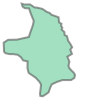

In [49]:
gdf.geometry[0]

In [50]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_96848/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=878372.1496506371, ymin=4058894.2146899896, xmax=917059.9433665382, ymax=4119262.3546824204, crs="EPSG:32610")

In [51]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1006,
    "cols": 644
  },
  "bbox": {
    "xmin": 878372.1496506371,
    "ymin": 4058902.3546824204,
    "xmax": 917012.1496506371,
    "ymax": 4119262.3546824204
  },
  "crs": "EPSG:32610",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [52]:
earthaccess.login(strategy="netrc", persist=True)

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

earthaccess.store - INFO - File EMIT_L2A_RFLUNCERT_001_20230415T222420_2310515_007.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_MASK_001_20230415T222420_2310515_007.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_RFL_001_20230415T222420_2310515_007.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_MASK_001_20230415T222420_2310515_007.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_RFL_001_20230415T222420_2310515_007.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

earthaccess.store - INFO - File EMIT_L2A_RFL_001_20230415T222432_2310515_008.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_RFLUNCERT_001_20230415T222432_2310515_008.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_MASK_001_20230415T222432_2310515_008.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_RFLUNCERT_001_20230415T222432_2310515_008.nc already downloaded
earthaccess.store - INFO - File EMIT_L2A_MASK_001_20230415T222432_2310515_008.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

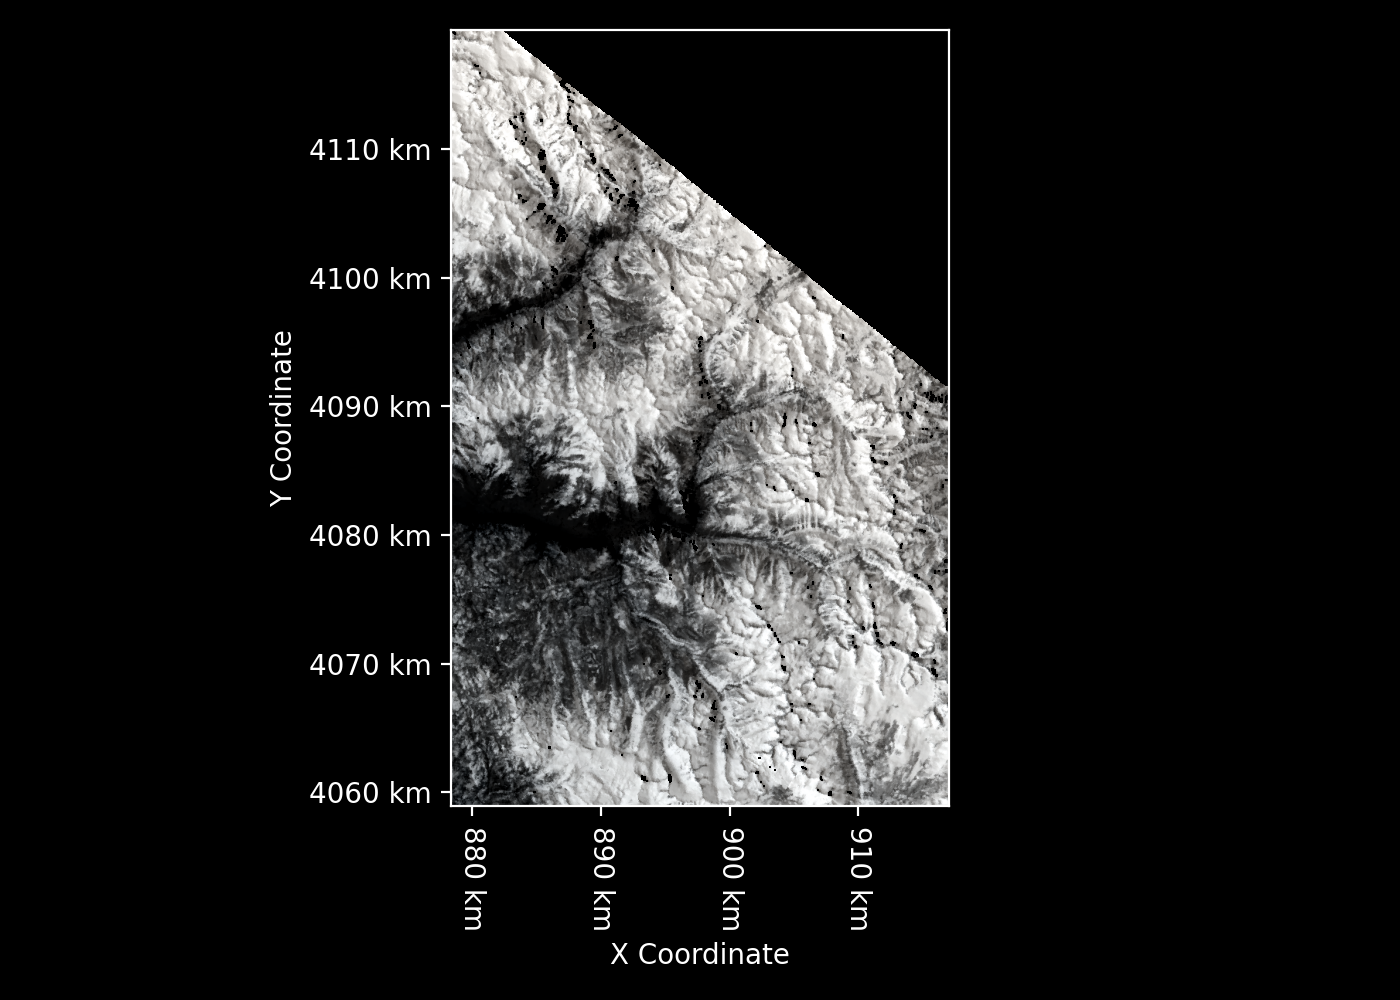

In [53]:
merged_cube = retrieve_EMIT_L2A_RFL(
    date_UTC=date_UTC,
    geometry=grid
)

merged_cube

In [ ]:
output_directory = "~/data/Kings Canyon EMIT"

filenames = generate_EMIT_L2A_RFL_timeseries(
    start_date_UTC=start_date_UTC,
    end_date_UTC=end_date_UTC,
    geometry=grid,
    output_directory=output_directory
)

filenames

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - generating EMIT L2A RFL timeseries from 2022-08-01 to 2025-11-01
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-01 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-01 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2022-08-01 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-02 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2022-08-01 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-02 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2022-08-02 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-03 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2022-08-02 00:00

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20220813.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-14 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-14 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2022-08-14 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-15 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20220817.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-18 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-18 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2022-08-18 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2022-08-19 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230129.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-01-30 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-01-30 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-01-30 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-01-31 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230216.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-02-17 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-02-17 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-02-17 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-02-18 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230328.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-03-29 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-03-29 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-03-29 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-03-30 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230731.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-01 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-01 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-08-01 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-02 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230804.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-05 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-05 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-08-05 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-06 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230808.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-09 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-09 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-08-09 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-10 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230826.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-27 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-27 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-08-27 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-08-28 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - saving merged cube: ~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20231015.tif
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-10-16 00:00:00
/opt/homebrew/Caskroom/miniforge/base/envs/EMITL2ARFL/lib/python3.10/site-packages/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-10-16 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - no EMIT granules available for date 2023-10-16 00:00:00
EMITL2ARFL.generate_EMIT_L2A_RFL_timeseries - INFO - processing date: 2023-10-17 

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230415.tif


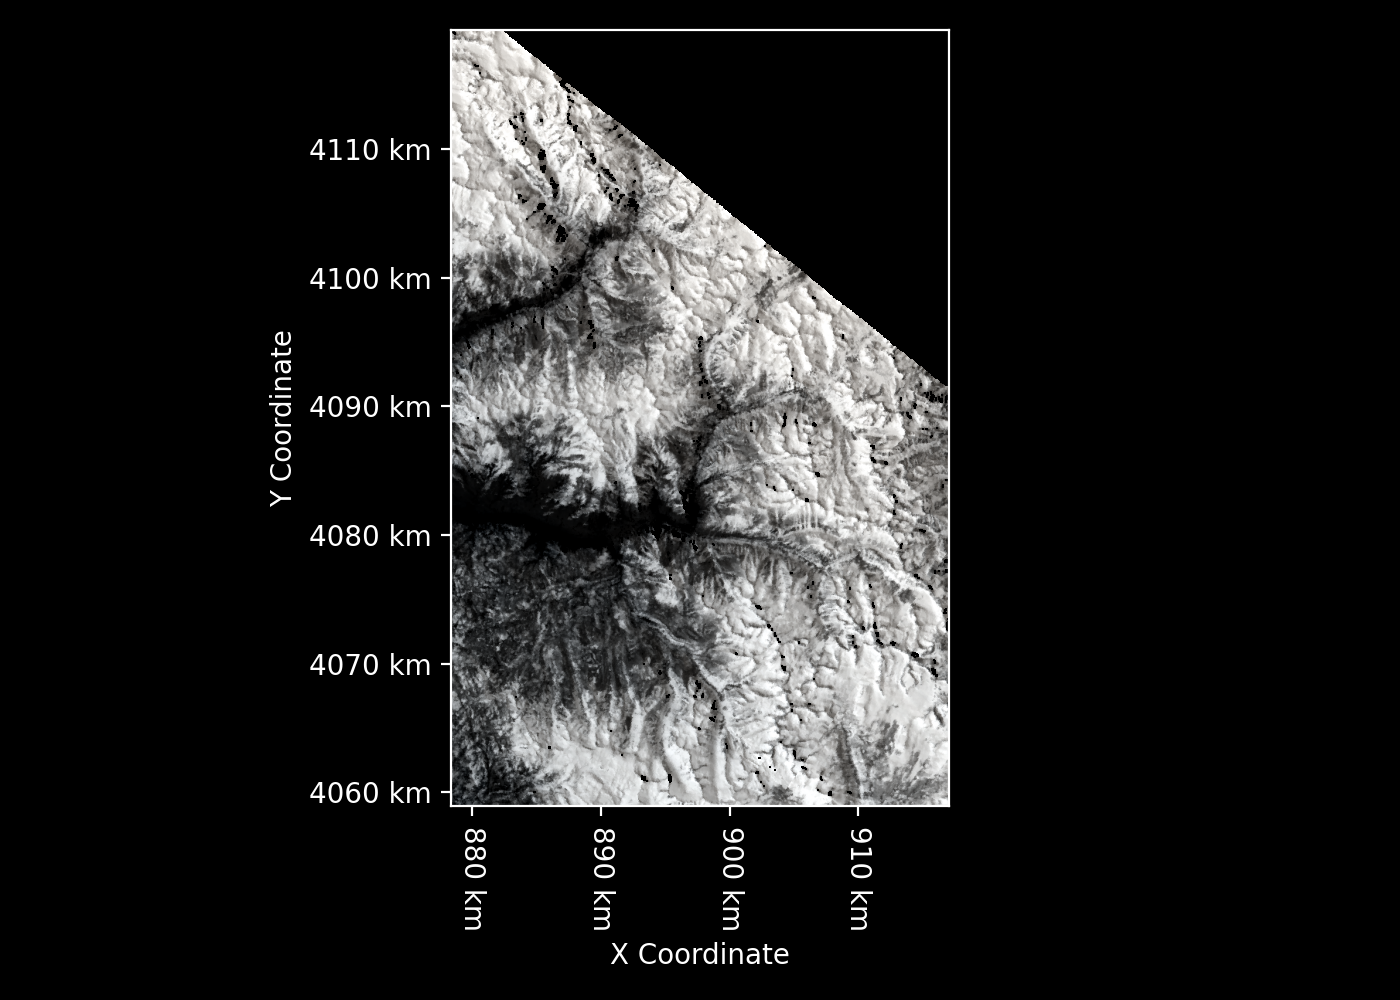

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230423.tif


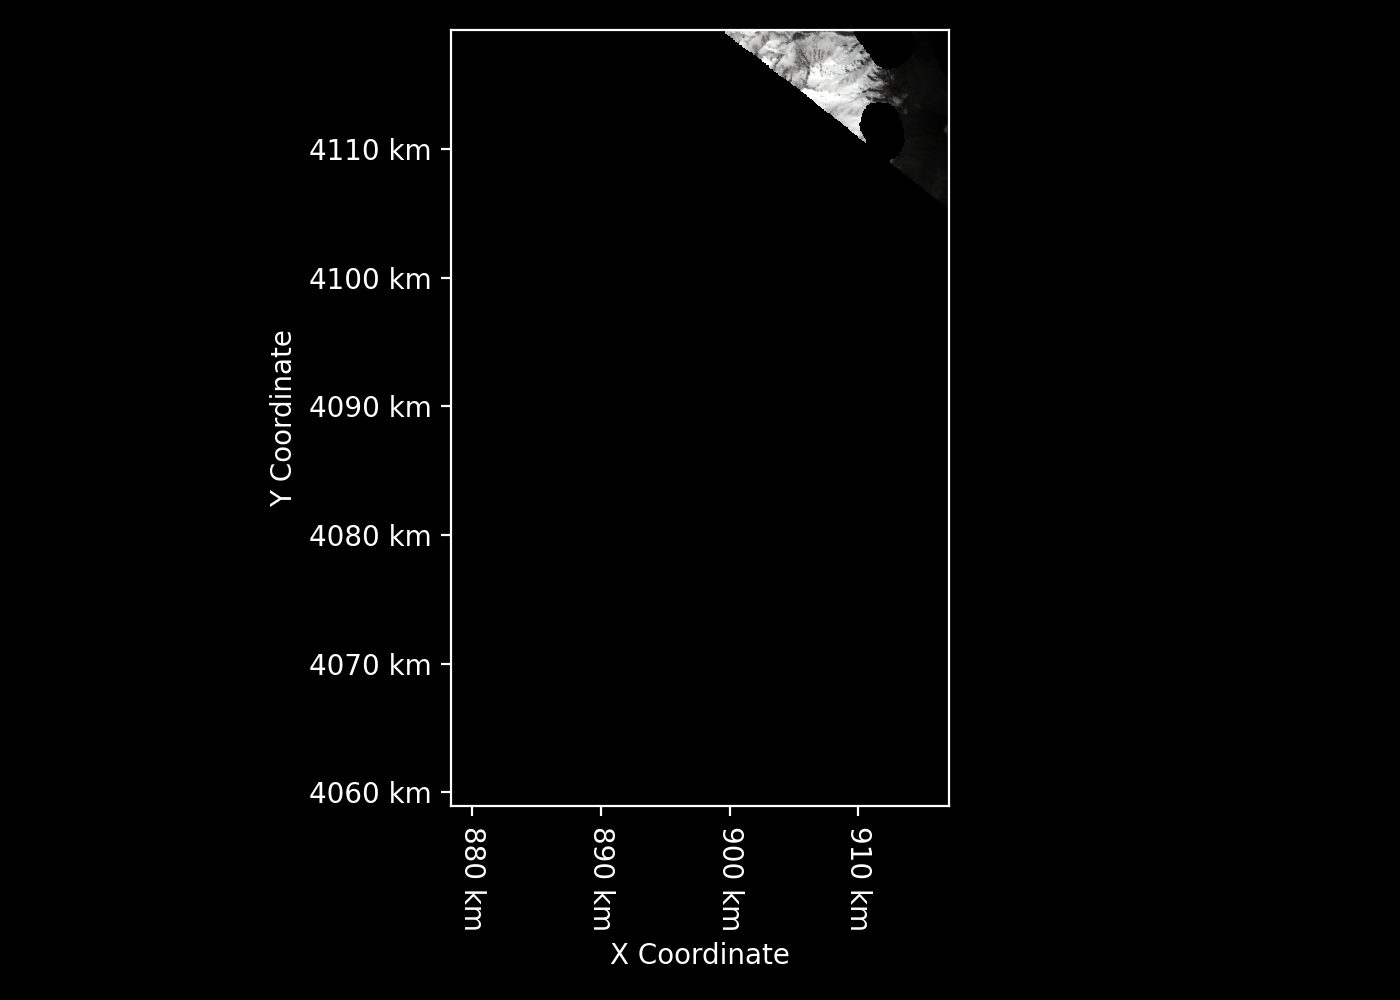

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230528.tif


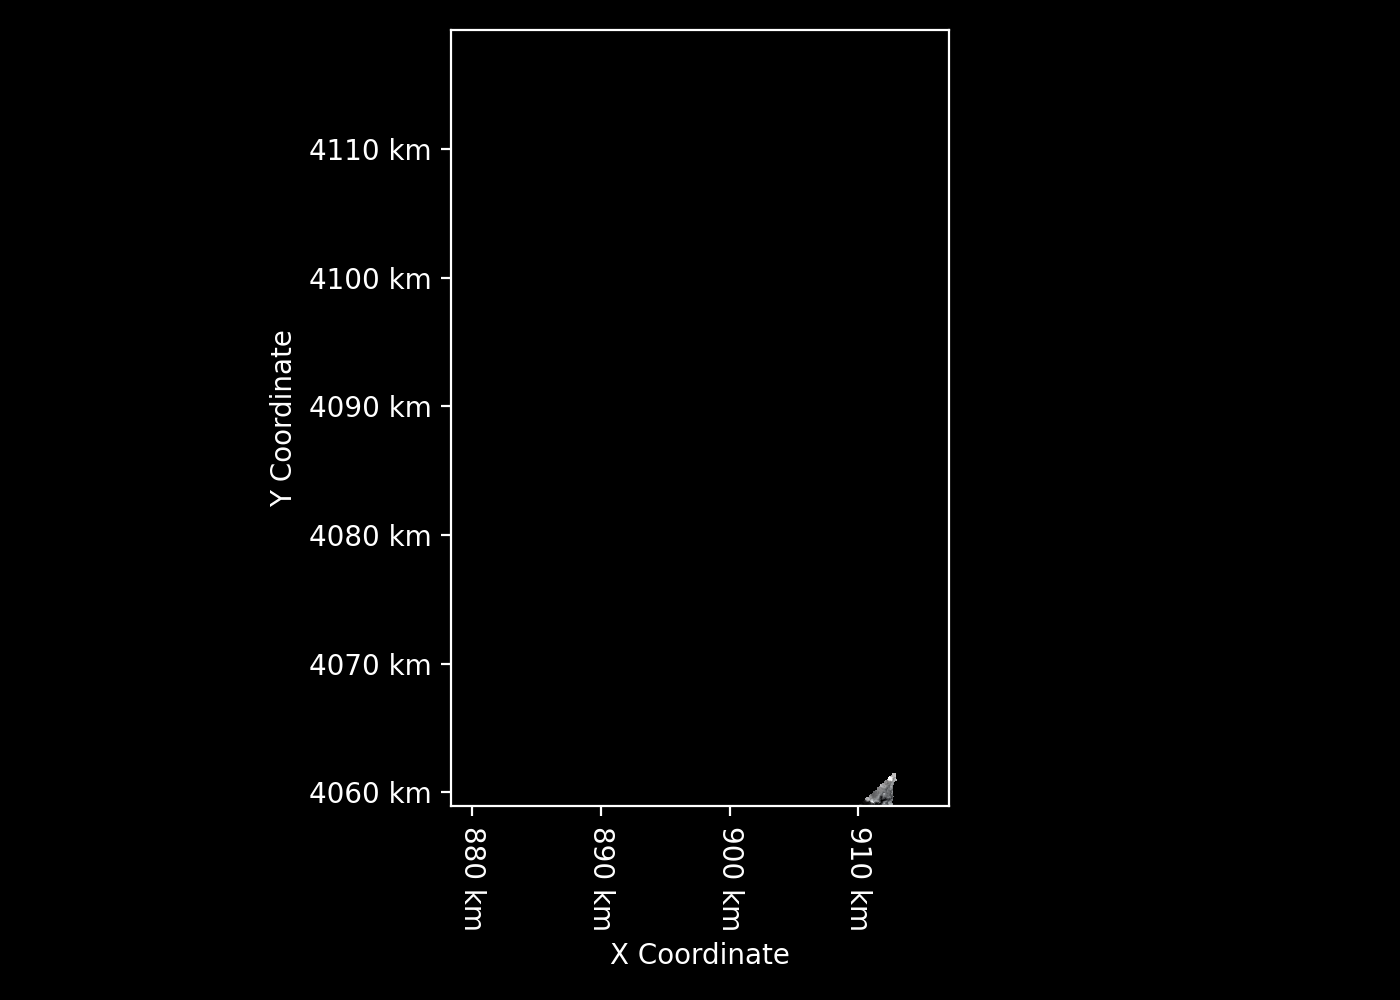

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230622.tif


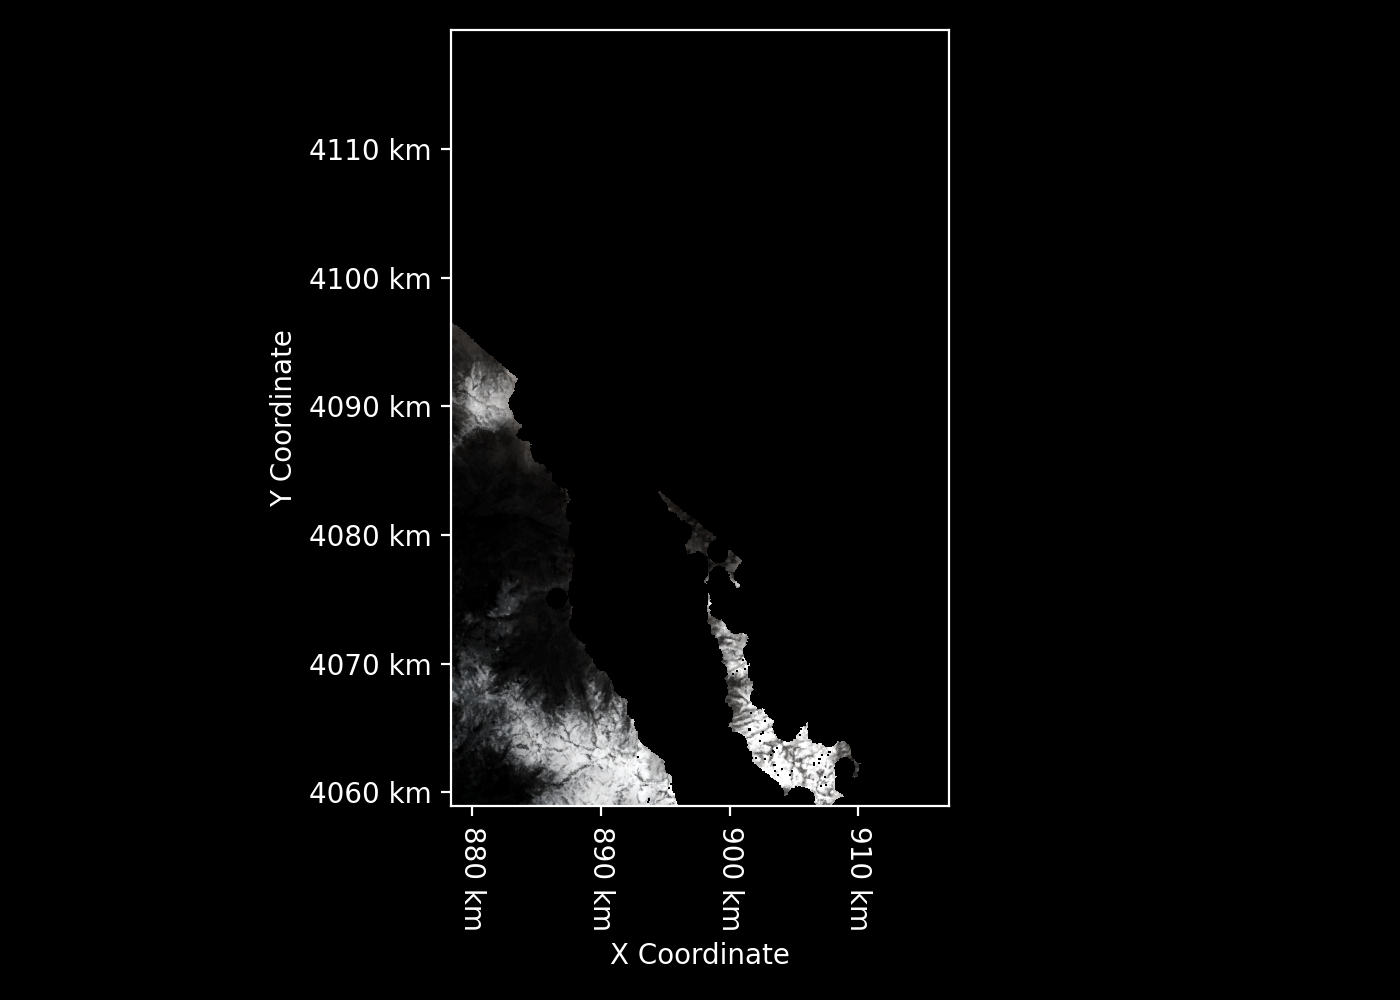

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_20230626.tif


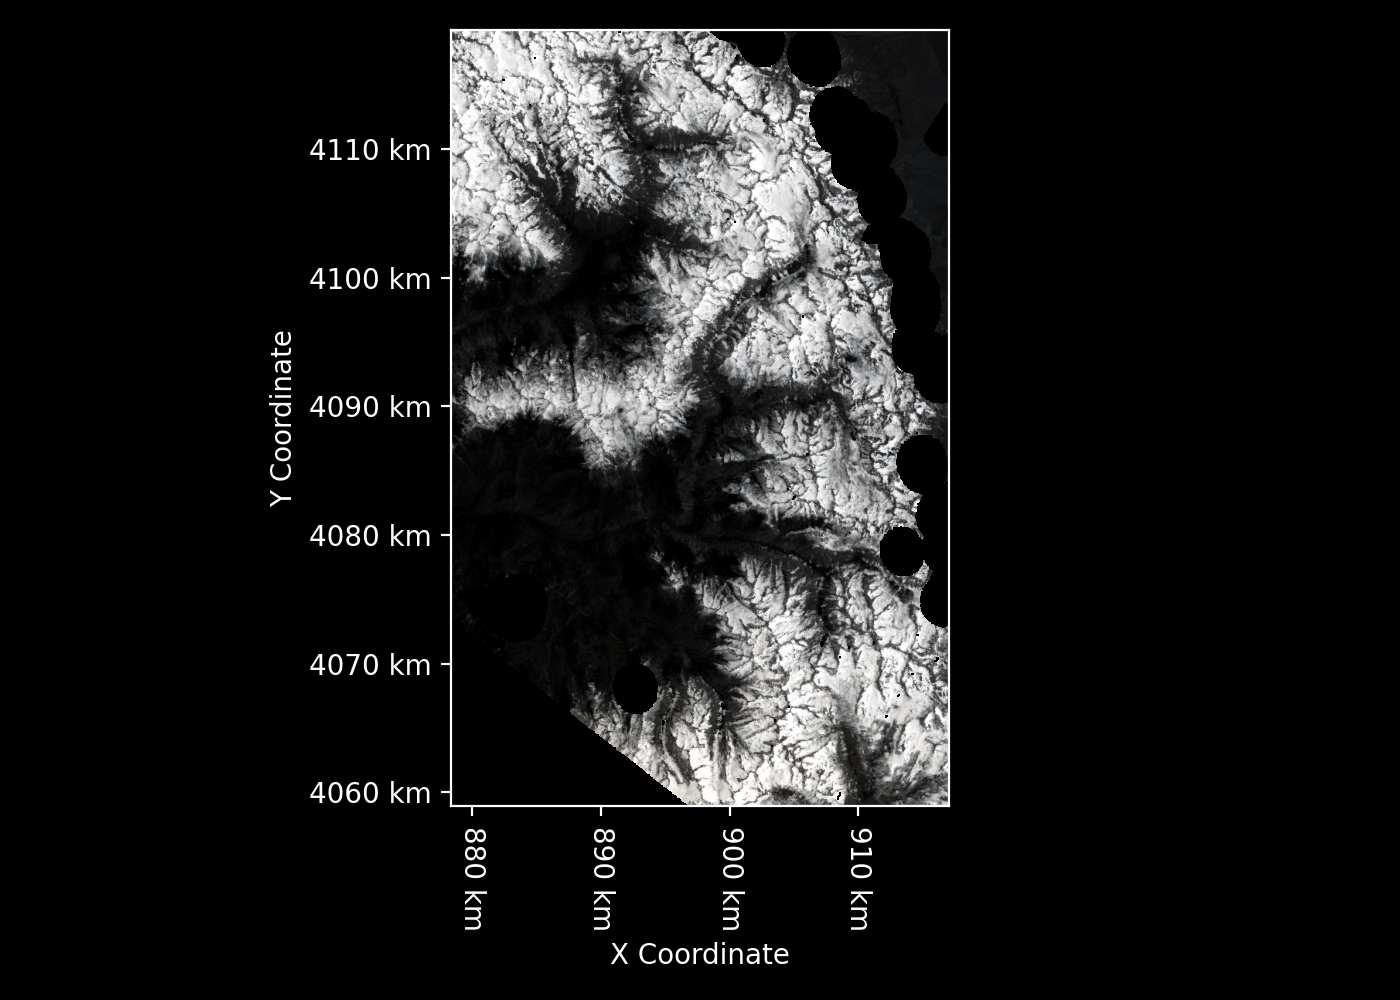

In [ ]:
for filename in filenames:
    print(filename)
    raster = MultiRaster.open(filename)
    display(raster)